# LOGISTIC REGRESSION

STATISTICAL THEORY 

The simple linear regression model is appropriate for relating a quantitative response
variable to a quantitative predictor x.

Now consider 𝑦 as a categorical variable that takes two values, depending on the numerical variable 𝑥. Let $y$ take the vaalues $1$ and $0$ corresponding to $Success$ and $Failure$, respectievely.

Define $p = P(Success) = P(1)$. Then the value of $p$  will depend on the value of some
quantitative variable $x$. 

In Logistic Regression we model some function of mean value of $y$ as a linear function of $\beta_0$ and $\beta_1$
- DEFENITION Logit Function

$$p(x) = \frac{ e^{\beta_0 + \beta_1 x}}{1 + e^{\beta_0 + \beta_1 x}}$$
 
$ Logistic\ regression$ means assuming that $p(x)$ is related to x by the logit function.


Straightforward algebra shows that
$$ \frac{p(x)}{1-p(x)} = e^{\beta_0 + \beta_1 x}$$


If we take $ln$ on both sides $$ ln\{\frac{p(x)}{1-p(x)}\} = \beta_0 + \beta_1 x$$

The function $\frac{p(x)}{1 - p(x)}$ is called the odds.

If $\frac{p(60)}{1 - p(60)}$ is 3, then when a success is three times as likely as a failure

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

### QUESTION

The article “Acceptable Noise Levels for Construction Site Offices” (Building Serv. Engr. Res. Tech., 2009:
87–94) analyzed responses from a sample of 77 individuals, each of whom was asked to say whether a particular
noise level (dBA) to which he/she had been exposed was
acceptable or unacceptable. Here is data provided by the
article’s authors:

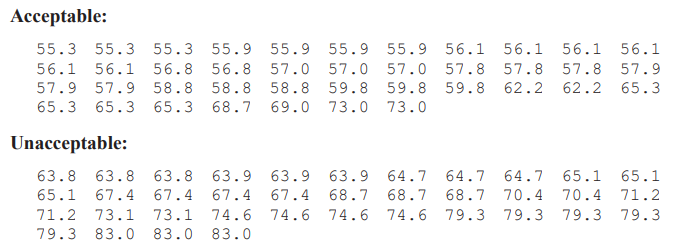

QUESTION

- Fit logistic regression model and interpret the output 
- Sketch a graph of the estimated probability of a noise level being acceptable as a function of the level

### ANSWER

##### Fitting Logistic Regression and Interpreting the Output

#### <FONT COLOR = DARKGREEN> Creating dataframe noice level and acceptance

In [2]:


data = {
    "Noice Level": [55.3 ,55.3, 55.3, 55.9, 55.9, 55.9, 55.9, 56.1, 56.1, 56.1, 56.1,
56.1 ,56.1 ,56.8, 56.8, 57.0, 57.0 ,57.0, 57.8, 57.8, 57.8, 57.9,
57.9, 57.9, 58.8, 58.8, 58.8 ,59.8 ,59.8, 59.8, 62.2, 62.2, 65.3,
65.3, 65.3, 65.3, 68.7, 69.0, 73.0, 73.0,63.8,63.8 ,63.8 ,63.9, 63.9, 63.9, 64.7, 64.7, 64.7, 65.1, 65.1,
65.1, 67.4, 67.4, 67.4, 67.4 ,68.7 ,68.7, 68.7 ,70.4 ,70.4 ,71.2,
71.2, 73.1, 73.1, 74.6, 74.6, 74.6 ,74.6, 79.3, 79.3, 79.3, 79.3,
79.3, 83.0, 83.0, 83.0]
    
}

df = pd.DataFrame(data)

# Create a column with all elements 0
df['Acceptable'] = 0

# Set the first 40 elements of the 'Raw' column to 1 i.e, first 40 noices are acceptable
df.loc[:39, 'Acceptable'] = 1

# The next 37 elements are already set to 0 by default, so no further action is needed

df

,Noice Level,Acceptable
0,55.3,1
1,55.3,1
2,55.3,1
3,55.9,1
4,55.9,1
...,...,...
72,79.3,0
73,79.3,0
74,83.0,0
75,83.0,0


In [3]:
# Preparing the data
X = df[['Noice Level']]
y = df['Acceptable']

# Adding a constant to the predictor variable matrix
# This is done for getting coefficients and analysis of constant term in regression
# By default, statsmodels does not include the intercept in the regression model unless it is explicitly specified.
X_const = sm.add_constant(X)

# Fitting the model using statsmodels
logit_model = sm.Logit(y, X_const)
result = logit_model.fit()

# Printing the summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.353003
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             Acceptable   No. Observations:                   77
Model:                          Logit   Df Residuals:                       75
Method:                           MLE   Df Model:                            1
Date:                Thu, 02 May 2024   Pseudo R-squ.:                  0.4902
Time:                        17:29:20   Log-Likelihood:                -27.181
converged:                       True   LL-Null:                       -53.314
Covariance Type:            nonrobust   LLR p-value:                 4.849e-13
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          23.0140      5.041      4.565      0.000      13.133      32.895
Noice Level    -0.3562    

In [4]:
# Calculating odds ratios and corresponding 95% confidence intervals
odds_ratios = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = odds_ratios

# Rename the columns for better readability
conf.columns = ['2.5%', '97.5%', 'Odds Ratio']
conf

,2.5%,97.5%,Odds Ratio
const,505293.279606,1.932709e+14,9.882230e+09
Noice Level,0.600573,8.166583e-01,7.003307e-01


#### <font color = DarkGreen> Conclusion

Inference regarding coefficients of Noice Level
- From the summary, the coefficient for Noise Level is -0.3562, with an associated P-value of 0.000, indicating high statistical significance. Under the null hypothesis ($H_0$), the coefficient is not significant, whereas the alternative hypothesis ($H_a$) asserts that the coefficient is significant. Given that the P-value is effectively zero, far below any conventional significance level, we reject the null hypothesis. Therefore, we accept the alternative hypothesis ($H_a$), concluding that Noise Level significantly influences the acceptability criteria.
- The negative sign in the coefficient of noice level indicates that  the likelihood of a level being acceptable does decrease as the level
increases. 

Inference Regarding odd ratio of  Noice Level

- The odd ratio of Noice level is 0.700330 this means each 1 dBA increase in noise level, the odds of acceptability decreases by a factor of .70.

#### <FONT COLOR = DARKGREEN> Creating graph of noice acceptance level

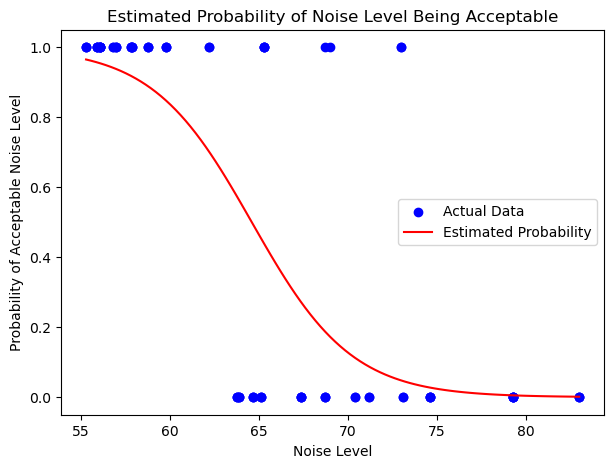

In [5]:
# Define the noise levels for prediction
noise_levels = np.linspace(df['Noice Level'].min(), df['Noice Level'].max(), 100)

# Calculate the estimated probabilities using the logistic regression model
intercept = result.params['const']
slope = result.params['Noice Level']
probabilities = 1 / (1 + np.exp(-(intercept + slope * noise_levels)))

# Plot the graph
plt.figure(figsize=(7, 5))
plt.scatter(df['Noice Level'], df['Acceptable'], color='blue', label='Actual Data')
plt.plot(noise_levels, probabilities, color='red', label='Estimated Probability')
plt.xlabel('Noise Level')
plt.ylabel('Probability of Acceptable Noise Level')
plt.title('Estimated Probability of Noise Level Being Acceptable')
plt.legend()
plt.show()

As noice level increases the probability of acceptance level decreases.